<a href="https://colab.research.google.com/github/shahulrashid/internship_tasks/blob/main/house_price_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [2]:
dataset=pd.read_csv("/content/drive/MyDrive/internship/Housing.csv")

In [3]:
dataset

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [4]:
dataset.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [11]:
le_main=LabelEncoder()
dataset["mainroad"]=le_main.fit_transform(dataset["mainroad"])

le_guestroom=LabelEncoder()
dataset["guestroom"]=le_guestroom.fit_transform(dataset["guestroom"])

le_basement=LabelEncoder()
dataset["basement"]=le_basement.fit_transform(dataset["basement"])

le_airconditioningm=LabelEncoder()
dataset["airconditioning"]=le_guestroom.fit_transform(dataset["airconditioning"])

le_prefarea=LabelEncoder()
dataset["prefarea"]=le_guestroom.fit_transform(dataset["prefarea"])

le_furnishingstatus=LabelEncoder()
dataset["furnishingstatus"]=le_furnishingstatus.fit_transform(dataset["furnishingstatus"])

le_hotwaterheating=LabelEncoder()
dataset["hotwaterheating"]=le_hotwaterheating.fit_transform(dataset["hotwaterheating"])

In [12]:
dataset

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0


In [16]:
x=dataset.drop("price", axis=1)
y=dataset["price"]

In [17]:
x

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,0
1,8960,4,4,4,1,0,0,0,1,3,0,0
2,9960,3,2,2,1,0,1,0,0,2,1,1
3,7500,4,2,2,1,0,1,0,1,3,1,0
4,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,0,1,0,0,2,0,2
541,2400,3,1,1,0,0,0,0,0,0,0,1
542,3620,2,1,1,1,0,0,0,0,0,0,2
543,2910,3,1,1,0,0,0,0,0,0,0,0


In [18]:
y

,price
0,13300000
1,12250000
2,12250000
3,12215000
4,11410000
...,...
540,1820000
541,1767150
542,1750000
543,1750000


In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [22]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [30]:
y_predict=model.predict(x_test)
mse=mean_squared_error(y_test,y_predict)
r2=model.score(x_test,y_test)
mse,r2

(1771751116594.0352, 0.6494754192267803)

In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

Mean Absolute Error (MAE): 979679.6912959901
Mean Squared Error (MSE): 1771751116594.0352
R² Score: 0.6494754192267803


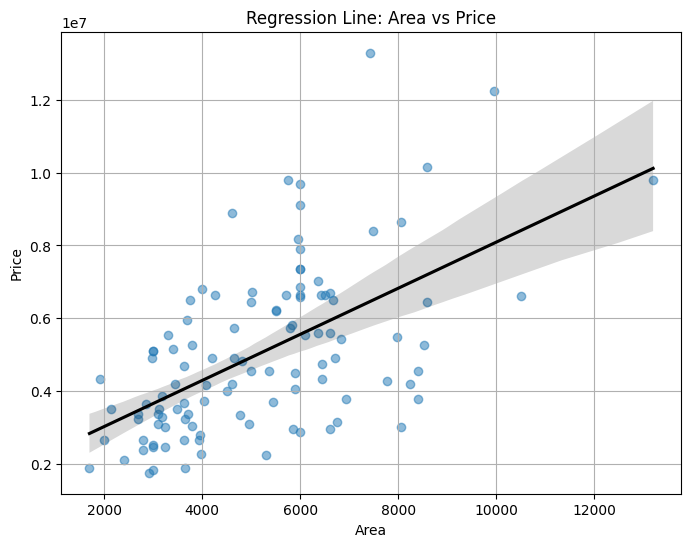

In [35]:
feature = 'area'

plt.figure(figsize=(8, 6))
sns.regplot(x=x_test[feature], y=y_test, line_kws={"color": "black"}, scatter_kws={"alpha": 0.5})
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Regression Line: Area vs Price")
plt.grid(True)
plt.show()

In [40]:
print("\nCoefficients:", model.coef_)
print("Intercept:", model.intercept_)


Coefficients: [ 2.35848772e+02  7.85744924e+04  1.09711727e+06  4.06223164e+05
  3.66824192e+05  2.33146766e+05  3.93159779e+05  6.87881311e+05
  7.85550579e+05  2.25756514e+05  6.29901661e+05 -2.10397118e+05]
Intercept: 293083.06915066857
